In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy.stats import norm

# Análisis del dataset

## Overview 

In [2]:
male_df = pd.read_csv('./fifa_2022/players_22.csv')

/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (25,108) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
male_df.dtypes

sofifa_id            int64
player_url          object
short_name          object
long_name           object
player_positions    object
                     ...  
player_face_url     object
club_logo_url       object
club_flag_url       object
nation_logo_url     object
nation_flag_url     object
Length: 110, dtype: object

In [4]:
male_df.shape

(19239, 110)

In [5]:
male_df.head(5)

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


## Selección de columnas

### Descripción de las columnas
- short_name object
- long_name object
- player_positions object
- overall int64
- potential int64
- value_eur float64
- wage_eur float64
- age int64
- dob object
- height_cm int64
- weight_kg int64
- club_team_id float64
- club_name object
- league_name object
- league_level float64
- club_position object
- club_jersey_number float64
- club_loaned_from object
- club_joined object
- club_contract_valid_until float64
- nationality_id int64
- nationality_name object
- nation_team_id float64
- nation_position object
- nation_jersey_number float64
- preferred_foot object
- weak_foot int64
- skill_moves int64
- international_reputation int64
- work_rate object
- body_type object
- real_face object
- release_clause_eur float64
- player_tags object
- player_traits object
- pace float64
- shooting float64
- passing float64
- dribbling float64
- defending float64
- physic float64
- attacking_crossing int64
- attacking_finishing int64
- attacking_heading_accuracy int64
- attacking_short_passing int64
- attacking_volleys int64
- skill_dribbling int64
- skill_curve int64
- skill_fk_accuracy int64
- skill_long_passing int64
- skill_ball_control int64
- movement_acceleration int64
- movement_sprint_speed int64
- movement_agility int64
- movement_reactions int64
- movement_balance int64
- power_shot_power int64
- power_jumping int64
- power_stamina int64
- power_strength int64
- power_long_shots int64
- mentality_aggression int64
- mentality_interceptions int64
- mentality_positioning int64
- mentality_vision int64
- mentality_penalties int64
- mentality_composure int64
- defending_marking_awareness int64
- defending_standing_tackle int64
- defending_sliding_tackle int64
- goalkeeping_diving int64
- goalkeeping_handling int64
- goalkeeping_kicking int64
- goalkeeping_positioning int64
- goalkeeping_reflexes int64
- goalkeeping_speed float64
- ls,player attribute playing as Left Striker
- st,player attribute playing as Striker
- rs,player attribute playing as Right Striker
- lw,player attribute playing as Left Winger
- lf,player attribute playing as Left Forward
- cf,player attribute playing as Central Forward or Second Forward
- rf,player attribute playing as Right Forward
- rw,player attribute playing as Right Winger
- lam,player attribute playing as Left Attacking Midfielder
- cam,player attribute playing as Central Attacking Midfielder
- ram,player attribute playing as Right Attacking Midfielder
- lm,player attribute playing as Left Midfielder
- lcm,player attribute playing as Left Central Midfielder
- cm,player attribute playing as Central Midfielder
- rcm,player attribute playing as Right Central Midfielder
- rm,player attribute playing as Right Midfielder
- lwb,player attribute playing as Left Wing Back
- ldm,player attribute playing as Left Defensive Midfielder
- cdm,player attribute playing as Central Defensive Midfielder
- rdm,player attribute playing as Right Defensive Midfielder
- rwb,player attribute playing as Right Wing Back
- lb,player attribute playing as Left Back
- lcb,player attribute playing as Left Central Back
- cb,player attribute playing as Central Back
- rcb,player attribute playing as Right Central Back
- rb,player attribute playing as Right Back
- gk,player attribute playing as Goalkeaper
- player_face_url,URL of the player face
- club_logo_url,URL of the club logo
- club_flag_url,URL of the club nationality flag
- nation_logo_url,URL of the national team logo
- nation_flag_url,URL of the national flag

In [6]:
for i,j in male_df.dtypes.iteritems():
    print(i,j)

sofifa_id int64
player_url object
short_name object
long_name object
player_positions object
overall int64
potential int64
value_eur float64
wage_eur float64
age int64
dob object
height_cm int64
weight_kg int64
club_team_id float64
club_name object
league_name object
league_level float64
club_position object
club_jersey_number float64
club_loaned_from object
club_joined object
club_contract_valid_until float64
nationality_id int64
nationality_name object
nation_team_id float64
nation_position object
nation_jersey_number float64
preferred_foot object
weak_foot int64
skill_moves int64
international_reputation int64
work_rate object
body_type object
real_face object
release_clause_eur float64
player_tags object
player_traits object
pace float64
shooting float64
passing float64
dribbling float64
defending float64
physic float64
attacking_crossing int64
attacking_finishing int64
attacking_heading_accuracy int64
attacking_short_passing int64
attacking_volleys int64
skill_dribbling int64
skil

### Columnas url
Procedemos a eliminar columnas con url ya que no son útiles para el análisis.

In [7]:
for i in male_df.columns:
    if i.__contains__('url'):
        print(i)

player_url
player_face_url
club_logo_url
club_flag_url
nation_logo_url
nation_flag_url


In [8]:
male_df.drop(['player_face_url','player_url','club_logo_url','club_flag_url','nation_logo_url','nation_flag_url'],axis=1,inplace=True)

### Selección de índice
Usamos columna sofifa_id como índice del dataframe.

In [9]:
male_df.set_index('sofifa_id',drop=True,inplace=True)

### Nombres
Nos quedaremos únicamente con el Short Name.

In [10]:
male_df.drop('long_name',axis=1, inplace=True)

### Player Positions
Reduciremos el número de posiciones que encontramos en la columna "player_positions" a la primera que aparece.
Esto lo hacemos puesto que esa es la posición que ocupan la mayor parte de las veces.

In [11]:
male_df.player_positions = male_df.player_positions.apply(lambda x: x.split(',')[0])

Vemos que la columna "club_positions" coincide cn la columna "player_positions" que tenemos después de este cambio. 
Por tanto la eliminamos.

In [12]:
male_df.drop('player_positions',axis=1, inplace=True)

In [13]:
len(male_df.club_position.unique())

30

In [14]:
male_df.club_position.unique()

array(['RW', 'ST', 'LW', 'RCM', 'GK', 'CF', 'CDM', 'LCB', 'RDM', 'RS',
       'LCM', 'SUB', 'CAM', 'RCB', 'LDM', 'LB', 'RB', 'LM', 'RM', 'LS',
       'CB', 'RES', nan, 'RWB', 'RF', 'CM', 'LWB', 'LAM', 'LF', 'RAM'],
      dtype=object)

Vamos a ver como minimizar la categoría posición.
A continuación veremos un resumen de abreviaciones de posiciones.

GK - Goalkeeper

RB - Right Back

RWB - Right Wing Back

CB - Centre Back

LWB - Left Wing Back

LB - Left Back

CM - Centre Mid

CDM - Centre Defensive Mid

CAM - Centre Attacking Mid

RM - Right Mid

LM - Left Mid

LW - Left Wing

RW - Right Wing

CF - Centre Forward

LF - Left Forward

RF - Right Forward

ST - Striker

Visto esto decidimos generar 5 posiciones. 
Agruparemos los jugadores en F, M, D, GK y SUB or RES.

In [15]:
def position_agg(pos):
    if pos in ['CF','LF','RF','ST','LS','RS']:
        return 'F'
    elif pos in ['LM','RM','CAM','CM','RCM','LCM','LAM','RAM','CDM','LDM','RDM','LW','RW']:
        return 'M'
    elif pos in ['LB','LWB','CB','RWB','RB','LCB','RCB']:
        return 'D'
    else:
        return pos  

In [16]:
male_df.club_position = male_df.club_position.apply(lambda x: position_agg(x))

In [17]:
male_df.club_position.unique()

array(['M', 'F', 'GK', 'D', 'SUB', 'RES', nan], dtype=object)

In [18]:
male_df.club_position.value_counts()

SUB    8299
RES    3168
M      3161
D      2850
F       999
GK      701
Name: club_position, dtype: int64

### Value
Vemos cuantos de los jugadores no tienen este campo y visto que son un 0.38% de nuestra base de datos los eliminamos. 

In [19]:
len(male_df.value_eur.unique())

253

In [20]:
male_df.value_eur.isna().sum()

74

In [21]:
(male_df.value_eur.isna().sum() / len(male_df.value_eur) ) * 100

0.38463537605904674

In [22]:
male_df[male_df.value_eur.isna()]

,short_name,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
sofifa_id,,,,,,,,,,,,,,,,,,,,,
184087,T. Alderweireld,83,83,NaN,NaN,32,1989-03-02,186,81,NaN,...,81+2,81+2,81+2,77+3,78+3,82+1,82+1,82+1,78+3,21+3
197242,G. Krychowiak,80,80,NaN,NaN,31,1990-01-29,187,84,NaN,...,78+2,78+2,78+2,74+3,74+3,77+3,77+3,77+3,74+3,18+3
187607,A. Dzyuba,78,78,NaN,NaN,32,1988-08-22,196,91,NaN,...,54+2,54+2,54+2,53+2,50+2,50+2,50+2,50+2,50+2,18+2
200094,M. Ozdoev,77,78,NaN,NaN,28,1992-11-05,184,78,NaN,...,76+2,76+2,76+2,74+2,73+2,73+2,73+2,73+2,73+2,19+2
154950,Y. Zhirkov,76,76,NaN,NaN,37,1983-08-20,180,75,NaN,...,74+2,74+2,74+2,75+1,74+2,72+2,72+2,72+2,74+2,15+2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241475,P. Soiri,61,62,NaN,NaN,26,1994-09-22,183,63,NaN,...,50+2,50+2,50+2,53+2,52+2,47+2,47+2,47+2,52+2,13+2
254704,K. Miura,59,59,NaN,700.0,54,1967-02-26,177,72,113197.0,...,37+2,37+2,37+2,35+2,31+2,32+2,32+2,32+2,31+2,12+2
2702,K. Ellison,58,58,NaN,2000.0,42,1979-02-23,185,76,112254.0,...,52+2,52+2,52+2,49+2,47+2,53+2,53+2,53+2,47+2,15+2


In [23]:
male_df.drop(list(male_df[male_df.value_eur.isna()].index),axis=0,inplace=True)

Podemos ver también que muchos de los jugadores tienen un salario entre las primeras franjas, de 0 a 250,000 USD.

<AxesSubplot:>

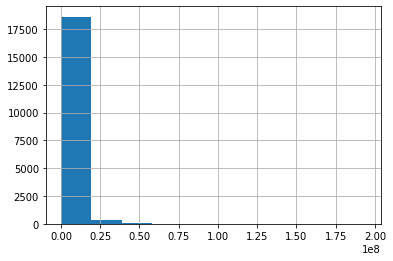

In [24]:
male_df.value_eur.hist()

<AxesSubplot:xlabel='value_eur', ylabel='Count'>

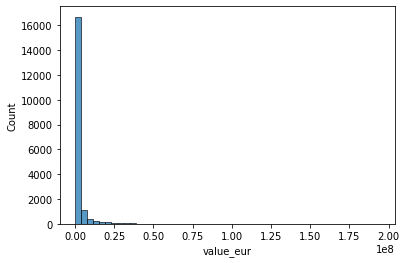

In [25]:
sns.histplot(data=male_df,x='value_eur',bins=50)

Transformamos esto a logaritmo puesto que pensamos que puede tener una distribución normal.

In [26]:
male_df['log_value_eur'] = np.log(male_df['value_eur'])

<AxesSubplot:xlabel='log_value_eur', ylabel='Count'>

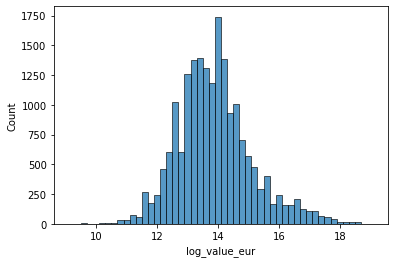

In [27]:
sns.histplot(data=male_df,x='log_value_eur',bins=50)

In [28]:
from scipy.stats import kstest

z,p = kstest(male_df.value_eur, 'norm', alternative='less')
print(p < 0.05)

True


El test nos dice que no la tiene y esto es debido a las franjas inapreciables en este gráfico en las cuales no encontramos datos. 

In [29]:
male_df.value_eur.quantile([.25, .5, .75])

0.25     475000.0
0.50     975000.0
0.75    2000000.0
Name: value_eur, dtype: float64

In [30]:
count = 0
listofeur = []
for i,j in male_df.value_eur.iteritems():
    listofeur.append(j)
    count += 1
    if count == 10:
        break

In [31]:
listofeur[0] + 1

78000001.0

In [32]:
male_df.value_eur.nlargest(10)

sofifa_id
231747    194000000.0
239085    137500000.0
202126    129500000.0
190871    129000000.0
192985    125500000.0
188545    119500000.0
230621    119500000.0
228702    119500000.0
233049    116500000.0
231281    114000000.0
Name: value_eur, dtype: float64

<AxesSubplot:>

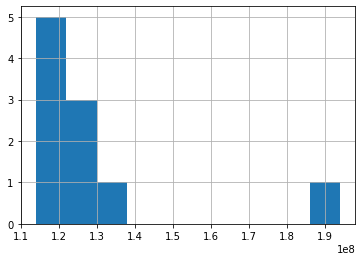

In [33]:
male_df.value_eur.nlargest(10).hist()

In [34]:
male_df.value_eur.nsmallest(10)

sofifa_id
245558     9000.0
102881    15000.0
166713    15000.0
183031    15000.0
138431    15000.0
149697    15000.0
157190    15000.0
140300    20000.0
186838    20000.0
232473    20000.0
Name: value_eur, dtype: float64

<AxesSubplot:>

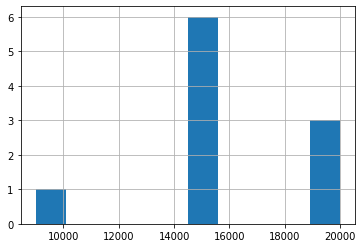

In [35]:
male_df.value_eur.nsmallest(10).hist()

In [36]:
male_df.drop('log_value_eur',axis=1,inplace=True)

### Wage
Observamos lo mismo que en la columna Value.

In [37]:
male_df.wage_eur.dtype

dtype('float64')

In [38]:
len(male_df.wage_eur.unique())

133

In [39]:
male_df.wage_eur.isna().sum()

0

<AxesSubplot:>

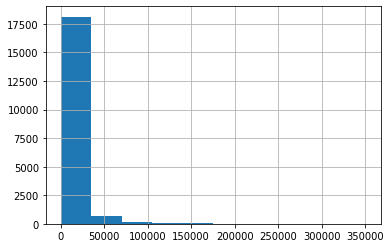

In [40]:
male_df.wage_eur.hist()

<AxesSubplot:xlabel='wage_eur', ylabel='Count'>

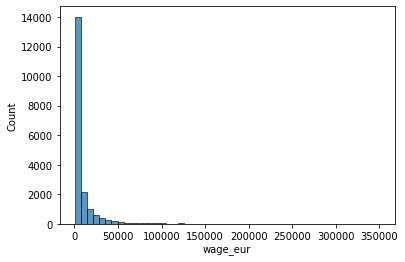

In [41]:
sns.histplot(data=male_df,x='wage_eur',bins=50)

In [42]:
male_df['log_wage_eur'] = np.log(male_df.wage_eur)

<AxesSubplot:xlabel='log_wage_eur', ylabel='Count'>

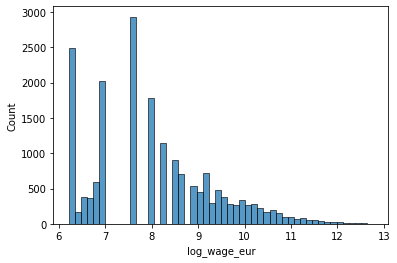

In [43]:
sns.histplot(data=male_df,x='log_wage_eur',bins=50)

In [44]:
z,p = kstest(male_df.wage_eur, 'norm', alternative='two-sided')
print(p < 0.05)

True


In [45]:
z, p

(1.0, 0.0)

In [46]:
male_df.drop('log_wage_eur',axis=1,inplace=True)

### Edad
Lo que vemos en esta columna es que los jugadores se concentran mayoritariamente entre los 21 y los 29. 

In [47]:
male_df.age.dtype

dtype('int64')

In [48]:
len(male_df.age.unique())

28

<AxesSubplot:xlabel='age'>

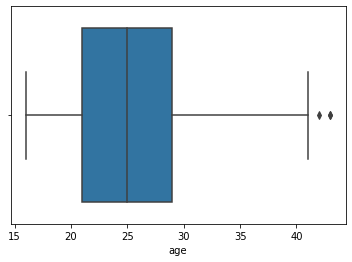

In [49]:
sns.boxplot(x = male_df.age)

### Fecha de nacimiento
Esta columna la vamos a cambia a formato fecha. 

In [50]:
male_df.dob.dtypes

dtype('O')

In [51]:
male_df.dob.head()

sofifa_id
158023    1987-06-24
188545    1988-08-21
20801     1985-02-05
190871    1992-02-05
192985    1991-06-28
Name: dob, dtype: object

In [52]:
male_df.dob =  pd.to_datetime(male_df.dob.apply(lambda x: str(x)))

In [53]:
male_df.dob.dtypes

dtype('<M8[ns]')

### Altura
Vemos que tiene una distribución normal.
Para comprobarlo hemos utilizado un k-test

In [54]:
# column 9
# height cm has the adequate format but and looks like a normal distribution but
# does not compute the kstest properly...?

In [55]:
len(male_df.height_cm.unique())

49

<AxesSubplot:>

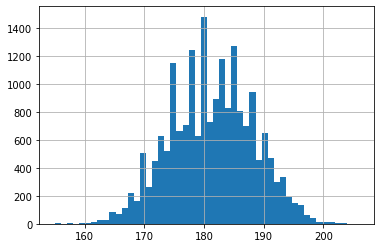

In [56]:
male_df.height_cm.hist(bins=50)

In [57]:
male_df.height_cm

sofifa_id
158023    170
188545    185
20801     187
190871    175
192985    181
         ... 
261962    180
262040    175
262760    178
262820    173
264540    167
Name: height_cm, Length: 19165, dtype: int64

In [58]:
loc, scale = norm.fit(male_df.height_cm)
# create a normal distribution with loc and scale
n = norm(loc=loc, scale=scale)

In [59]:
z,p = kstest(male_df.height_cm, n.cdf, alternative='two-sided')
print(p < 0.05)

True


In [60]:
z,p = kstest(male_df.height_cm, 'norm', alternative='two-sided')
print(p < 0.05)

True


In [61]:
from scipy.stats import shapiro

In [62]:
z,p = shapiro(male_df.height_cm.values)

/usr/local/lib/python3.9/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [63]:
print(z,p)

0.9959070682525635 1.5190657738443894e-22


In [64]:
male_df.height_cm.isna().sum()

0

### Peso
Vemos el mismo comportamiento que la variable altura.

In [65]:
len(male_df.weight_kg.unique())

58

In [66]:
male_df.weight_kg.dtype

dtype('int64')

<AxesSubplot:>

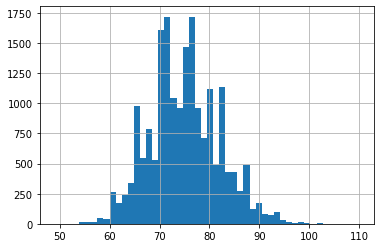

In [67]:
male_df.weight_kg.hist(bins=50)

In [68]:
z,p = kstest(male_df.weight_kg, cdf='norm' ,alternative='two-sided')
print(p < 0.05)

True


In [69]:
z, p

(1.0, 0.0)

### Club id's
Elimino aquellas variables que no me servirán para el análisis.

In [70]:
male_df.drop('club_team_id',axis=1,inplace=True)

### Club name, league name, league level
Todos estos campos los vamos a mantener. 

In [71]:
len(male_df.club_name.unique())

701

In [72]:
male_df.club_name.isna().sum()

0

In [73]:
male_df.league_name

sofifa_id
158023                    French Ligue 1
188545              German 1. Bundesliga
20801             English Premier League
190871                    French Ligue 1
192985            English Premier League
                       ...              
261962              Chinese Super League
262040    Rep. Ireland Airtricity League
262760    Rep. Ireland Airtricity League
262820    Rep. Ireland Airtricity League
264540               Indian Super League
Name: league_name, Length: 19165, dtype: object

In [74]:
len(male_df.league_name.unique())

55

In [75]:
len(male_df.league_level.unique())

5

In [76]:
male_df.league_level.unique()

array([1., 2., 3., 4., 5.])

In [77]:
male_df.league_level.dtypes

dtype('float64')

### Número de Camiseta
El número de camiseta no vemos necesario mantenerlo así que lo vamos a eliminar puesto que aporta en algunos casos aporta el valor de posición en el campo y en otros ninguno.

In [78]:
male_df.club_jersey_number

sofifa_id
158023    30.0
188545     9.0
20801      7.0
190871    10.0
192985    17.0
          ... 
261962    36.0
262040    27.0
262760    31.0
262820    12.0
264540    13.0
Name: club_jersey_number, Length: 19165, dtype: float64

In [79]:
male_df.drop('club_jersey_number',axis=1,inplace=True)

In [80]:
male_df.nation_jersey_number

sofifa_id
158023    10.0
188545     9.0
20801      7.0
190871     NaN
192985     7.0
          ... 
261962     NaN
262040     NaN
262760     NaN
262820     NaN
264540     NaN
Name: nation_jersey_number, Length: 19165, dtype: float64

In [81]:
male_df.drop('nation_jersey_number',axis=1,inplace=True)

### Cedido por
Este valor puede transformarse en una variable dicotomica/binaria. 
Hacemos el cambio pertinente y la transormamos en "cedido" y "no cedido".

In [82]:
male_df.club_loaned_from.isna().sum()

18063

In [83]:
male_df.club_loaned_from

sofifa_id
158023    NaN
188545    NaN
20801     NaN
190871    NaN
192985    NaN
         ... 
261962    NaN
262040    NaN
262760    NaN
262820    NaN
264540    NaN
Name: club_loaned_from, Length: 19165, dtype: object

In [84]:
male_df.club_loaned_from.isna().sum() / len(male_df.club_loaned_from) 

0.9424993477693713

In [85]:
male_df.club_loaned_from.apply(lambda x: 0 if isinstance(x,float) else 1)

sofifa_id
158023    0
188545    0
20801     0
190871    0
192985    0
         ..
261962    0
262040    0
262760    0
262820    0
264540    0
Name: club_loaned_from, Length: 19165, dtype: int64

In [86]:
male_df.club_loaned_from = male_df.club_loaned_from.apply(lambda x: 0 if isinstance(x,float) else 1)

### Fecha de incorporación al club
La fecha de incorporación la cambiamos a formato fecha.

In [87]:
male_df.club_joined.dtypes

dtype('O')

In [88]:
male_df.club_joined = pd.to_datetime(male_df.club_joined.apply(lambda x: str(x)))

In [89]:
male_df.club_joined.dtypes

dtype('<M8[ns]')

### Fecha de validez de contrato
Eliminamos esta columna puesto que para nuestro estudio no es relevante.

In [90]:
male_df.club_contract_valid_until

sofifa_id
158023    2023.0
188545    2023.0
20801     2023.0
190871    2025.0
192985    2025.0
           ...  
261962    2021.0
262040    2021.0
262760    2021.0
262820    2021.0
264540    2025.0
Name: club_contract_valid_until, Length: 19165, dtype: float64

In [91]:
male_df.drop('club_contract_valid_until',axis=1,inplace=True)

### Nationality ID
La eliminamos puesto que mantendremos el nombre de la nacionalidad. 

In [92]:
male_df.drop('nationality_id',axis=1,inplace=True)

In [93]:
len(male_df.nation_team_id.unique())

34

In [94]:
male_df.nation_team_id.isna().sum()

18467

### Posición en el equipo nacional
Esta columna la mantendremos pero la agregaremos en las posiciones que habiamos visto.

In [95]:
# column 23
# 'nation_position' is similar to other columns player and national_position, maybe we can
# drop it..
# we use again the position_aggregate function

In [96]:
nation_club_position = male_df.nation_position == male_df.club_position

In [97]:
male_df[nation_club_position]

,short_name,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_name,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
sofifa_id,,,,,,,,,,,,,,,,,,,,,
167495,M. Neuer,90,90,13500000.0,86000.0,35,1986-03-27,193,93,FC Bayern München,...,43+3,43+3,43+3,37+3,35+3,34+3,34+3,34+3,35+3,88+2
192119,T. Courtois,89,91,85500000.0,250000.0,29,1992-05-11,199,96,Real Madrid CF,...,31+3,31+3,31+3,29+3,29+3,29+3,29+3,29+3,29+3,86+3
230621,G. Donnarumma,89,93,119500000.0,110000.0,22,1999-02-25,196,90,Paris Saint-Germain,...,34+3,34+3,34+3,31+3,31+3,31+3,31+3,31+3,31+3,87+3
167948,H. Lloris,87,87,13500000.0,125000.0,34,1986-12-26,188,82,Tottenham Hotspur,...,38+3,38+3,38+3,35+3,34+3,30+3,30+3,30+3,34+3,85+2
186153,W. Szczęsny,87,87,42000000.0,105000.0,31,1990-04-18,195,90,Juventus,...,31+3,31+3,31+3,28+3,28+3,29+3,29+3,29+3,28+3,85+2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238273,J. Marković,64,75,1300000.0,3000.0,20,2001-03-23,183,75,Universitatea Craiova,...,49+2,49+2,49+2,49+2,48+2,48+2,48+2,48+2,48+2,15+2
231954,Xu Xin,63,65,525000.0,4000.0,27,1994-04-19,179,70,Shandong Taishan,...,62+2,62+2,62+2,60+2,60+2,62+2,62+2,62+2,60+2,16+2
231131,J. McGarry,62,69,750000.0,800.0,23,1998-04-09,180,75,Wellington Phoenix,...,57+2,57+2,57+2,61+2,60+2,56+2,56+2,56+2,60+2,14+2


In [98]:
male_df.nation_position = male_df.nation_position.apply(lambda x: position_agg(x))

In [99]:
male_df.nation_position.value_counts()

SUB    361
M      144
D      122
F       41
GK      30
Name: nation_position, dtype: int64

In [100]:
male_df.nation_position.isna().sum()

18467

### Pie preferido
Esta columna la vamos a cambiar a númerica para usarla más fácilmente en nuestro modelo. 

In [101]:
male_df.preferred_foot

sofifa_id
158023     Left
188545    Right
20801     Right
190871    Right
192985    Right
          ...  
261962    Right
262040    Right
262760    Right
262820    Right
264540    Right
Name: preferred_foot, Length: 19165, dtype: object

In [102]:
male_df.preferred_foot.value_counts()

Right    14616
Left      4549
Name: preferred_foot, dtype: int64

In [103]:
male_df.preferred_foot.isna().sum()

0

In [104]:
male_df.preferred_foot = male_df.preferred_foot.apply(lambda x: 0 if x == 'Left' else 1)

### Pie débil
Vemos que los valores van de 5 a 1. Esto expresa como de débil es su pie débil.

In [105]:
male_df['weak_foot'].unique()

array([4, 5, 3, 1, 2])

In [106]:
male_df['weak_foot'].isna().sum()

0

### Skills
Esta columna la dejaremos, tiene valores del 1 al 5 como la anterior.

In [107]:
male_df['skill_moves'].unique()

array([4, 5, 1, 3, 2])

In [108]:
male_df['skill_moves'].isna().sum()

0

### Reputación internacional
La dejaremos como está ya que tiene valores del 1-5.

In [109]:
male_df['international_reputation'].unique()

array([5, 4, 3, 2, 1])

In [110]:
male_df['international_reputation'].isna().sum()

0

### Body type, Real Face, Player Tags, Player Traits
Vamos a eliminar estas columnas puesto que no tienen valor para nuestro análisis.

In [111]:
male_df.drop('body_type',axis=1, inplace=True)
male_df.drop('real_face',axis=1, inplace=True)
male_df.drop('player_tags',axis=1, inplace=True)
male_df.drop('player_traits',axis=1, inplace=True)

### Work Rate
Esta columna habla de cual es su nivel de entrenamiento en ataque/defensa.
Vamos a simplificarla dividiendola en dos y pasandola a numérica.

In [112]:
male_df['work_rate'].unique()

array(['Medium/Low', 'High/Medium', 'High/Low', 'High/High',
       'Medium/Medium', 'Medium/High', 'Low/High', 'Low/Medium',
       'Low/Low'], dtype=object)

In [113]:
male_df['work_rate'].dtype

dtype('O')

In [114]:
for i,j in male_df.work_rate.iteritems():
    if j=='High/High':
        male_df.loc[i,'work_rate_attacking']=3
        male_df.loc[i,'work_rate_deffensive']=3
    elif j=='Medium/High':
        male_df.loc[i,'work_rate_attacking']=2
        male_df.loc[i,'work_rate_deffensive']=3
    elif j=='Low/High':
        male_df.loc[i,'work_rate_attacking']=1
        male_df.loc[i,'work_rate_deffensive']=3
    elif j=='High/Medium':
        male_df.loc[i,'work_rate_attacking']=3
        male_df.loc[i,'work_rate_deffensive']=2
    elif j=='Medium/Medium':
        male_df.loc[i,'work_rate_attacking']=2
        male_df.loc[i,'work_rate_deffensive']=2
    elif j=='Low/Medium':
        male_df.loc[i,'work_rate_attacking']=1
        male_df.loc[i,'work_rate_deffensive']=2
    elif j=='High/Low':
        male_df.loc[i,'work_rate_attacking']=3
        male_df.loc[i,'work_rate_deffensive']=1
    elif j=='Medium/Low':
        male_df.loc[i,'work_rate_attacking']=2
        male_df.loc[i,'work_rate_deffensive']=1
    elif j=='Low/Low':
        male_df.loc[i,'work_rate_attacking']=1
        male_df.loc[i,'work_rate_deffensive']=1

In [115]:
male_df.work_rate_deffensive=male_df.work_rate_deffensive.apply(lambda x: int(x))

male_df.work_rate_attacking=male_df.work_rate_attacking.apply(lambda x: int(x))

In [116]:
male_df['work_rate_attacking'].unique()

array([2, 3, 1])

In [117]:
male_df['work_rate_deffensive'].unique()

array([1, 2, 3])

In [118]:
male_df.drop('work_rate',inplace=True, axis=1)

### Release Clause
En esta columna veremos el precio de su cláusula de salida, si es que esa variable es aplicable. 

In [119]:
male_df['release_clause_eur'].dtype

dtype('float64')

In [120]:
male_df['release_clause_eur'].isna().sum()

1102

In [121]:
male_df['release_clause_eur'].isna().sum() / len(male_df['release_clause_eur'])

0.05750065223062875

In [122]:
male_df['release_clause_eur'] = male_df['release_clause_eur'].fillna(0)

In [123]:
male_df['release_clause_eur'].isna().sum()

0

### Attributes
Ahora vamos a explorar distintos atributos de los jugadores. 
Todos ellos se mantendran por el momento pues desconocemos sus correlaciones y su relación con nuestra variable de estudio.

#### Pace

In [124]:
male_df['pace'].unique()

array([85., 78., 87., 91., 76., nan, 97., 70., 88., 65., 90., 72., 53.,
       84., 75., 89., 71., 73., 83., 67., 86., 64., 81., 79., 61., 68.,
       56., 63., 42., 50., 82., 93., 80., 66., 92., 77., 55., 95., 58.,
       60., 69., 62., 74., 59., 40., 57., 45., 94., 96., 32., 49., 52.,
       41., 51., 39., 54., 33., 47., 36., 44., 46., 48., 34., 35., 37.,
       43., 38., 30., 31., 28., 29.])

In [125]:
male_df['pace'].isna().sum()

2124

In [126]:
male_df['pace'] = male_df['pace'].fillna(0)

In [127]:
male_df['pace'].isna().sum()

0

#### Shooting

In [128]:
male_df['shooting'].unique()

array([92., 94., 83., 86., nan, 88., 91., 66., 87., 73., 60., 70., 90.,
       81., 82., 89., 76., 84., 61., 53., 69., 68., 38., 46., 59., 72.,
       62., 78., 28., 49., 79., 71., 50., 80., 41., 54., 74., 58., 63.,
       85., 75., 67., 55., 35., 77., 45., 65., 25., 64., 51., 43., 42.,
       52., 40., 47., 30., 57., 37., 56., 36., 32., 48., 31., 39., 33.,
       22., 34., 29., 44., 27., 20., 26., 23., 24., 18., 21., 19.])

In [129]:
male_df['shooting'].isna().sum()

2124

In [130]:
male_df['shooting'] = male_df['shooting'].fillna(0)

#### Passing

In [131]:
male_df['passing'].unique()

array([91., 79., 80., 86., 93., nan, 83., 75., 81., 82., 76., 71., 74.,
       89., 65., 67., 87., 85., 88., 60., 77., 90., 51., 64., 70., 78.,
       72., 53., 84., 69., 57., 58., 73., 44., 68., 55., 62., 61., 59.,
       56., 63., 66., 52., 50., 49., 48., 54., 47., 45., 46., 38., 40.,
       43., 39., 41., 35., 42., 36., 37., 34., 33., 31., 32., 29., 28.,
       25., 30., 27.])

In [132]:
male_df['passing'] = male_df['passing'].fillna(0)

In [133]:
male_df['passing'].isna().sum()

0

#### Dribbling

In [134]:
# column 37: 'dribbling'(player dribbling attribute)
male_df['dribbling'].unique()

array([95., 86., 88., 94., nan, 92., 83., 82., 87., 73., 72., 89., 90.,
       84., 74., 81., 78., 80., 91., 68., 59., 65., 69., 76., 85., 70.,
       79., 77., 58., 66., 62., 67., 63., 64., 71., 61., 51., 75., 57.,
       55., 60., 50., 56., 52., 49., 54., 53., 48., 46., 45., 41., 35.,
       44., 42., 47., 36., 43., 39., 37., 40., 34., 38., 33., 32., 31.,
       30., 28., 29., 27.])

In [135]:
male_df['dribbling'] = male_df['dribbling'].fillna(0)

#### Defending

In [136]:
# column 38: 'defending'(player defending attribute)
male_df['defending'].unique()

array([34., 44., 37., 64., nan, 36., 47., 87., 39., 43., 86., 91., 45.,
       83., 88., 71., 70., 33., 72., 48., 56., 65., 79., 89., 81., 40.,
       82., 77., 80., 38., 46., 52., 85., 30., 54., 78., 51., 35., 73.,
       59., 41., 76., 84., 57., 67., 68., 50., 75., 31., 42., 63., 69.,
       49., 55., 60., 53., 74., 27., 32., 58., 29., 66., 20., 25., 26.,
       61., 24., 28., 23., 22., 62., 19., 21., 18., 16., 17., 14., 15.])

In [137]:
male_df['defending'].isna().sum()

2124

In [138]:
male_df['defending'] = male_df['defending'].fillna(0)

#### Physic

In [139]:
# column 40: 'physic'(player physic attribute)
male_df['physic'].unique()

array([65., 82., 75., 63., 78., nan, 77., 83., 69., 90., 84., 79., 68.,
       66., 88., 71., 67., 81., 86., 60., 76., 72., 85., 45., 73., 80.,
       55., 53., 87., 58., 50., 59., 70., 64., 57., 61., 74., 62., 56.,
       52., 89., 48., 51., 42., 49., 54., 47., 46., 37., 35., 40., 43.,
       41., 39., 44., 34., 38., 36., 33., 31., 32., 29.])

In [140]:
male_df['physic'].isna().sum()

2124

In [141]:
male_df['physic'] = male_df['physic'].fillna(0)

In [142]:
male_df['physic'].isna().sum()

0

#### Attacking

In [143]:
male_df['attacking_crossing'].unique()

array([85, 71, 87, 94, 13, 78, 15, 18, 80, 68, 75, 14, 83, 58, 53, 79, 20,
       91, 17, 12, 66, 88, 73, 11, 47, 70, 86, 55, 77, 82, 92, 54, 63, 65,
       62, 30, 42, 81, 69, 74, 40, 60, 44, 16, 76, 49, 84, 64, 56, 52, 72,
       57, 22, 51, 35, 45, 24, 50, 67,  9, 27, 25, 59, 10, 46, 38, 19, 36,
       34, 48, 39, 61, 89, 90, 29, 41, 43,  8, 37, 32, 28, 23, 31, 21, 33,
       26,  7,  6])

In [144]:
male_df['attacking_crossing'].isna().sum()

0

In [145]:
male_df['attacking_finishing'].unique()

array([95, 83, 82, 11, 93, 13, 14, 94, 65, 90, 88, 64, 52, 86, 91, 68, 12,
       77, 92, 15, 85, 10, 72, 79, 75, 60, 51, 55, 29, 33, 57, 73, 67, 76,
       22, 46, 81, 89, 63, 45, 42, 40, 78, 48, 80, 84, 25, 50, 54, 16, 34,
       44, 39, 66, 69, 74, 37, 87, 71,  9, 70, 36, 19, 32, 61, 53, 31, 59,
        5, 47, 27, 56, 18, 30, 26, 62, 49,  8, 38, 28, 20, 41, 58, 17, 43,
       24, 35, 21,  6,  7, 23,  4,  3,  2])

In [146]:
male_df['attacking_finishing'].isna().sum()

0

In [147]:
male_df['attacking_heading_accuracy'].unique()

array([70, 90, 63, 55, 15, 72, 25, 11, 86, 54, 89, 13, 68, 79, 87, 84, 59,
       14, 29, 12, 92, 58, 46, 64, 69, 78, 10, 51, 16, 81, 74, 57, 88, 67,
       38, 77, 61, 48, 82, 75, 53, 83, 23, 50, 44, 73, 65, 56, 42, 60, 85,
       40, 21, 49, 66, 71, 26, 36, 52, 43, 76, 17, 47, 80, 39, 62, 19, 35,
       18, 45, 20, 34, 24, 28, 41, 93, 22,  7, 91, 30, 27, 37, 33, 32,  8,
        9, 31,  5,  6])

In [148]:
male_df['attacking_heading_accuracy'].isna().sum()

0

In [149]:
male_df['attacking_short_passing'].unique()

array([91, 85, 80, 86, 94, 43, 60, 61, 82, 33, 84, 79, 87, 45, 36, 83, 93,
       77, 40, 50, 32, 88, 90, 81, 65, 42, 92, 35, 63, 78, 74, 72, 44, 75,
       48, 73, 55, 89, 70, 39, 76, 30, 20, 23, 34, 25, 31, 18, 69, 46, 38,
       37, 17, 71, 27, 24, 67, 62, 66, 28, 26, 22, 68, 51, 29, 11, 56, 54,
       64, 49, 52, 59, 15, 58, 41, 16, 57, 14, 21, 53, 19, 12, 13, 47,  8,
        7])

In [150]:
male_df['attacking_short_passing'].isna().sum()

0

In [151]:
male_df['attacking_volleys'].unique()

array([88, 89, 86, 82, 13, 83, 11, 14, 56, 12, 78, 62, 45, 75, 81, 18, 69,
       20,  8, 90, 67, 87, 85, 76, 84, 64, 35, 32, 70, 61, 60, 44, 72, 74,
       42, 47, 40, 77, 59, 15, 58, 10, 57, 27, 49, 71, 68, 73, 80, 53, 79,
       16, 65, 30, 66, 37, 52, 51,  9, 50, 48, 39, 34, 63, 46, 33, 43, 23,
       31, 17, 28, 24, 54, 41, 38, 19, 36, 55, 22, 25,  5, 21, 29, 26,  6,
        7,  4,  3])

In [152]:
male_df['attacking_volleys'].isna().sum()

0

#### Skill

In [153]:
male_df['skill_dribbling'].unique()

array([96, 85, 88, 95, 12, 93, 30, 21, 83, 79, 87, 13, 69, 70, 90, 23, 27,
       28, 65, 80, 24, 78, 86, 10, 11, 77, 91, 84, 81, 92, 64, 57, 18, 82,
       14, 55, 63, 89, 67, 15, 74, 19, 66, 72, 71, 47, 61, 32, 76, 54, 50,
       68, 16, 60, 58, 59, 20, 73, 43,  9, 56, 75, 51, 22, 53, 52, 26, 25,
        8, 35, 62, 49, 34, 17, 48, 42, 45, 44, 40, 38, 31, 46, 29, 41, 39,
       36, 37, 33,  7,  6,  5,  4])

In [154]:
male_df['skill_dribbling'].isna().sum()

0

#### Movement, Power,  Mentality and Goalkeeping
Vemos que las siguientes columnas tienen la misma estructura que las exploradas anteriormente, por ello las mantenemos como están. 

In [155]:
male_df.iloc[:,40:64].isna().sum()

movement_sprint_speed              0
movement_agility                   0
movement_reactions                 0
movement_balance                   0
power_shot_power                   0
power_jumping                      0
power_stamina                      0
power_strength                     0
power_long_shots                   0
mentality_aggression               0
mentality_interceptions            0
mentality_positioning              0
mentality_vision                   0
mentality_penalties                0
mentality_composure                0
defending_marking_awareness        0
defending_standing_tackle          0
defending_sliding_tackle           0
goalkeeping_diving                 0
goalkeeping_handling               0
goalkeeping_kicking                0
goalkeeping_positioning            0
goalkeeping_reflexes               0
goalkeeping_speed              17041
dtype: int64

Vemos que la única columna con valores nulos es goalkeeping_speed, buscaremos pues solucionar los valores nulos.

In [156]:
male_df.drop('goalkeeping_speed',inplace=True, axis=1)

### Atributtes II
Vamos a intentar entender que nos dicen esto valores comparando jugadores que desarrollan diferentes posiciones.

In [157]:
male_df[(male_df.short_name == 'K. Mbappé') | (male_df.short_name == "N. Kanté") |
       (male_df.short_name == "P. Pogba") | (male_df.short_name == "A. Griezmann") |
       (male_df.short_name == "K. Benzema") | (male_df.short_name == "O. Dembélé") |
       (male_df.short_name == "B. Pavard") | (male_df.short_name == "H. Lloris") |
       (male_df.short_name == "D. Upamecano")][['short_name','ls',
'st',
'rs',
'lw',
'lf',
'cf',
'rf',
'rw',
'lam',
'cam',
'ram',
'lm',
'lcm',
'cm',
'rcm',
'rm',
'lwb',
'ldm',
'cdm',
'rdm',
'rwb',
'lb',
'lcb',
'cb',
'rcb',
'rb',
'gk']]

,short_name,ls,st,rs,lw,lf,cf,rf,rw,lam,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
sofifa_id,,,,,,,,,,,,,,,,,,,,,
231747,K. Mbappé,89+3,89+3,89+3,90,90,90,90,90,89+3,...,63+3,63+3,63+3,67+3,63+3,54+3,54+3,54+3,63+3,18+3
215914,N. Kanté,72+3,72+3,72+3,77,77,77,77,77,78+3,...,87+3,87+3,87+3,85+3,85+3,84+3,84+3,84+3,85+3,20+3
165153,K. Benzema,87+2,87+2,87+2,85,87,87,87,85,86+3,...,62+3,62+3,62+3,63+3,59+3,55+3,55+3,55+3,59+3,18+3
167948,H. Lloris,31+3,31+3,31+3,33,34,34,34,33,38+3,...,38+3,38+3,38+3,35+3,34+3,30+3,30+3,30+3,34+3,85+2
195864,P. Pogba,82+3,82+3,82+3,82,83,83,83,82,85+2,...,78+3,78+3,78+3,74+3,72+3,72+3,72+3,72+3,72+3,13+3
194765,A. Griezmann,84+1,84+1,84+1,85,86-1,86-1,86-1,85,86-1,...,69+3,69+3,69+3,71+3,69+3,63+3,63+3,63+3,69+3,21+3
231443,O. Dembélé,76+3,76+3,76+3,83,81,81,81,83,81+3,...,58+3,58+3,58+3,63+3,59+3,47+3,47+3,47+3,59+3,17+3
229558,D. Upamecano,62+2,62+2,62+2,63,63,63,63,63,64+2,...,76+2,76+2,76+2,74+2,76+2,82+2,82+2,82+2,76+2,17+2
226851,B. Pavard,66+3,66+3,66+3,67,66,66,66,67,68+3,...,76+3,76+3,76+3,76+3,77+3,77+3,77+3,77+3,77+3,17+3


Una vez entendidos vamos a extraer los valores que suman y restan a estos atributos. 

In [158]:
male_df_78 = male_df.iloc[:,63:90]
male_df_78.head()

,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
sofifa_id,,,,,,,,,,,,,,,,,,,,,
158023,89+3,89+3,89+3,92,93,93,93,92,93,93,...,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3
188545,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,...,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3
20801,90+1,90+1,90+1,88,89,89,89,88,86+3,86+3,...,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3
190871,83+3,83+3,83+3,90,88,88,88,90,89+2,89+2,...,63+3,63+3,63+3,67+3,62+3,50+3,50+3,50+3,62+3,20+3
192985,83+3,83+3,83+3,88,87,87,87,88,89+2,89+2,...,80+3,80+3,80+3,79+3,75+3,69+3,69+3,69+3,75+3,21+3


In [159]:
for i in male_df_78.columns:
     male_df_78[i] = male_df_78[i].apply(lambda x: x.split('+')[0])
     male_df_78[i] = male_df_78[i].apply(lambda x: x.split('-')[0])

In [160]:
for x in male_df_78.columns:
    male_df[x]=male_df_78[x]

In [161]:
male_df

,short_name,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_name,...,rdm,rwb,lb,lcb,cb,rcb,rb,gk,work_rate_attacking,work_rate_deffensive
sofifa_id,,,,,,,,,,,,,,,,,,,,,
158023,L. Messi,93,93,78000000.0,320000.0,34,1987-06-24,170,72,Paris Saint-Germain,...,64,66,61,50,50,50,61,19,2,1
188545,R. Lewandowski,92,92,119500000.0,270000.0,32,1988-08-21,185,81,FC Bayern München,...,66,64,61,60,60,60,61,19,3,2
20801,Cristiano Ronaldo,91,91,45000000.0,270000.0,36,1985-02-05,187,83,Manchester United,...,59,63,60,53,53,53,60,20,3,1
190871,Neymar Jr,91,91,129000000.0,270000.0,29,1992-02-05,175,68,Paris Saint-Germain,...,63,67,62,50,50,50,62,20,3,2
192985,K. De Bruyne,91,91,125500000.0,350000.0,30,1991-06-28,181,70,Manchester City,...,80,79,75,69,69,69,75,21,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261962,Song Defu,47,52,70000.0,1000.0,22,1999-01-02,180,64,Wuhan FC,...,46,48,48,46,46,46,48,15,2,2
262040,C. Porter,47,59,110000.0,500.0,19,2002-03-18,175,70,Derry City,...,46,49,48,44,44,44,48,14,2,2
262760,N. Logue,47,55,100000.0,500.0,21,2000-02-07,178,72,Finn Harps,...,46,47,47,45,45,45,47,12,2,2


## Nuevo CSV
Crearemos un CSV con la database limpia.

In [162]:
male_df.to_csv('fifa_clean_def.csv')